# **Business Case: LoanTap Logistic Regression**

## **About LoanTap**

LoanTap is an online platform committed to delivering customized **loan products** to **millennials**. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

## **Business Problem**

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of individuals.

**Our Task is to:**

Analyze the dataset containing attributes for Individuals and determine if a credit line should be extended to them. In other words, we need to Determine the **creditworthiness** of potential borrowers using various attributes, to ensure that the loans are given to those who are most likely to **repay** them.

# **1. Exploratory Data Analysis - 1**

In [89]:
#Importing basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#Downloading File
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d


Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:01<00:00, 92.9MB/s]


In [91]:
#Loading data as pandas dataframe
df = pd.read_csv("logistic_regression.csv")

In [92]:
#Dataframe
pd.set_option('display.max_columns', 50)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [93]:
#columns
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

### **Column Description**

1. **loan_amnt** : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. **term** : The number of payments on the loan. Values are in months and can be either 36 or 60.
3. **int_rate** : Interest Rate on the loan
4. **installment** : The monthly payment owed by the borrower if the loan originates.
5. **grade** : LoanTap assigned loan grade
6. **sub_grade** : LoanTap assigned loan subgrade
7. **emp_title** :The job title supplied by the Borrower when applying for the loan.
8. **emp_length** : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. **home_ownership** : The home ownership status provided by the borrower during registration or obtained from the credit report.
10. **annual_inc** : The self-reported annual income provided by the borrower during registration.
11. **verification_status** : Indicates if income was verified by LoanTap, not verified, or if the income source was verified.
12. **issue_d** : The month which the loan was funded.
13. **loan_status** : Current status of the loan - Target Variable.
14. **purpose** : A category provided by the borrower for the loan request.
15. **title** : The loan title provided by the borrower.
16. **dti** : A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower's self-reported monthly income.
17. **earliest_cr_line** :The month the borrower's earliest reported credit line was opened.
18. **open_acc** : The number of open credit lines in the borrower's credit file.
19. **pub_rec** : Number of derogatory public records.
20. **revol_bal** : Total credit revolving balance
21. **revol_util** : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22. **total_acc** : The total number of credit lines currently in the borrower's credit file.
23. **initial_list_status** : The initial listing status of the loan. Possible values are - W, F
24. **application_type** : Indicates whether the loan is an individual application or a joint application with two co-borrowers.
25. **mort_acc** : Number of mortgage accounts.
26. **pub_rec_bankruptcies** : Number of public record bankruptcies.
27. **Address**: Address of the individual.

In [94]:
#shape of the dataset
df.shape

(396030, 27)

In [95]:
#data type of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [96]:
#Number of unique values for each column
for i in df.columns:
  print(i,":",df[i].nunique())

loan_amnt : 1397
term : 2
int_rate : 566
installment : 55706
grade : 7
sub_grade : 35
emp_title : 173105
emp_length : 11
home_ownership : 6
annual_inc : 27197
verification_status : 3
issue_d : 115
loan_status : 2
purpose : 14
title : 48816
dti : 4262
earliest_cr_line : 684
open_acc : 61
pub_rec : 20
revol_bal : 55622
revol_util : 1226
total_acc : 118
initial_list_status : 2
application_type : 3
mort_acc : 33
pub_rec_bankruptcies : 9
address : 393700


In [97]:
#unique values in categorical column
categorical_column = ["term", "grade", "sub_grade", "emp_length", "home_ownership", "verification_status", "loan_status", "purpose", "pub_rec", "initial_list_status", "application_type", "mort_acc", "pub_rec_bankruptcies"]
for i in categorical_column:
  print(i,":",df[i].unique())

term : [' 36 months' ' 60 months']
grade : ['B' 'A' 'C' 'E' 'D' 'F' 'G']
sub_grade : ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']
emp_length : ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]
home_ownership : ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE' 'ANY']
verification_status : ['Not Verified' 'Source Verified' 'Verified']
loan_status : ['Fully Paid' 'Charged Off']
purpose : ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']
pub_rec : [ 0.  1.  2.  3.  4.  6.  5.  8.  9. 10. 11.  7. 19. 13. 40. 17. 86. 12.
 24. 15.]
initial_list_status : ['w' 'f']
application_type : ['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']
mort_acc : [ 0.  3.  1.  4.  2.  6.  5. nan 10.  7. 

In [98]:
#statistical summary
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,NaN,NaN,NaN,14113.888089,8357.441341,500.0,8000.0,12000.0,20000.0,40000.0
term,396030,2,36 months,302005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,396030.0,NaN,NaN,NaN,13.6394,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,NaN,NaN,NaN,431.849698,250.72779,16.08,250.33,375.43,567.3,1533.81
grade,396030,7,B,116018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,396030,35,B3,26655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,373103,173105,Teacher,4389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,377729,11,10+ years,126041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,396030,6,MORTGAGE,198348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,396030.0,NaN,NaN,NaN,74203.175798,61637.621158,0.0,45000.0,64000.0,90000.0,8706582.0


In [99]:
#missing value detection
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


Observations:

1. There are **396030 rows** and **27 columns** in our dataset.
2. Data type of column “issue_d” and “earliest_cr_line” is “object” although the value in them are **dates**.
3. Many Columns like "term", "grade", "sub_grade", "home_ownership", "verification_status", "loan_status” etc. can be treated as **Categorical** column as they have limited number of unique values.
4. Column like “emp_title”, “emp_length” and “mort_acc” have very **high number of missing values** whereas columns like “title”, “revol_util” and “pub_rec_bankruptcies” also have some missing values.

# **2. Data Preprocessing - 1**

## **Missing value treatment**

In [100]:
#emp_title --> replacing NA with "Unknown"
df["emp_title"] = df["emp_title"].fillna("Unknown")

In [101]:
#emp_length --> replacing NA with "Unknown"
df["emp_length"] = df["emp_length"].fillna("Unknown")

In [102]:
#title --> replacing NA with "Unknown"
df["title"] = df["title"].fillna("Unknown")

In [103]:
#revol_util --> replacing NA with mean value
df["revol_util"] = df["revol_util"].fillna(df["revol_util"].mean())

In [104]:
#mort_acc --> replacing NA with mean value
df["mort_acc"] = df["mort_acc"].fillna(round(df["mort_acc"].mean(),0))

In [105]:
#pub_rec_bankruptcies --> replacing NA with mean value
df["pub_rec_bankruptcies"] = df["pub_rec_bankruptcies"].fillna(round(df["pub_rec_bankruptcies"].mean(),0))

In [106]:
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0


### **Observations:**

1. All the missing values were successfully filled with values which appeared appropriate for the respective column category.
2. There are **no more missing value** in the dataset.


## **Duplicate value check**

In [107]:
df.duplicated().sum()

0

### **Observation:**
There is **no duplication** of rows in dataset.


## **Outlier detection.**

In [108]:
numerical_column = df.select_dtypes(include="number").columns
numerical_column = numerical_column.drop("pub_rec")
numerical_column = numerical_column.drop("mort_acc")
numerical_column = numerical_column.drop("pub_rec_bankruptcies")
numerical_column = numerical_column.drop("open_acc")
numerical_column

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

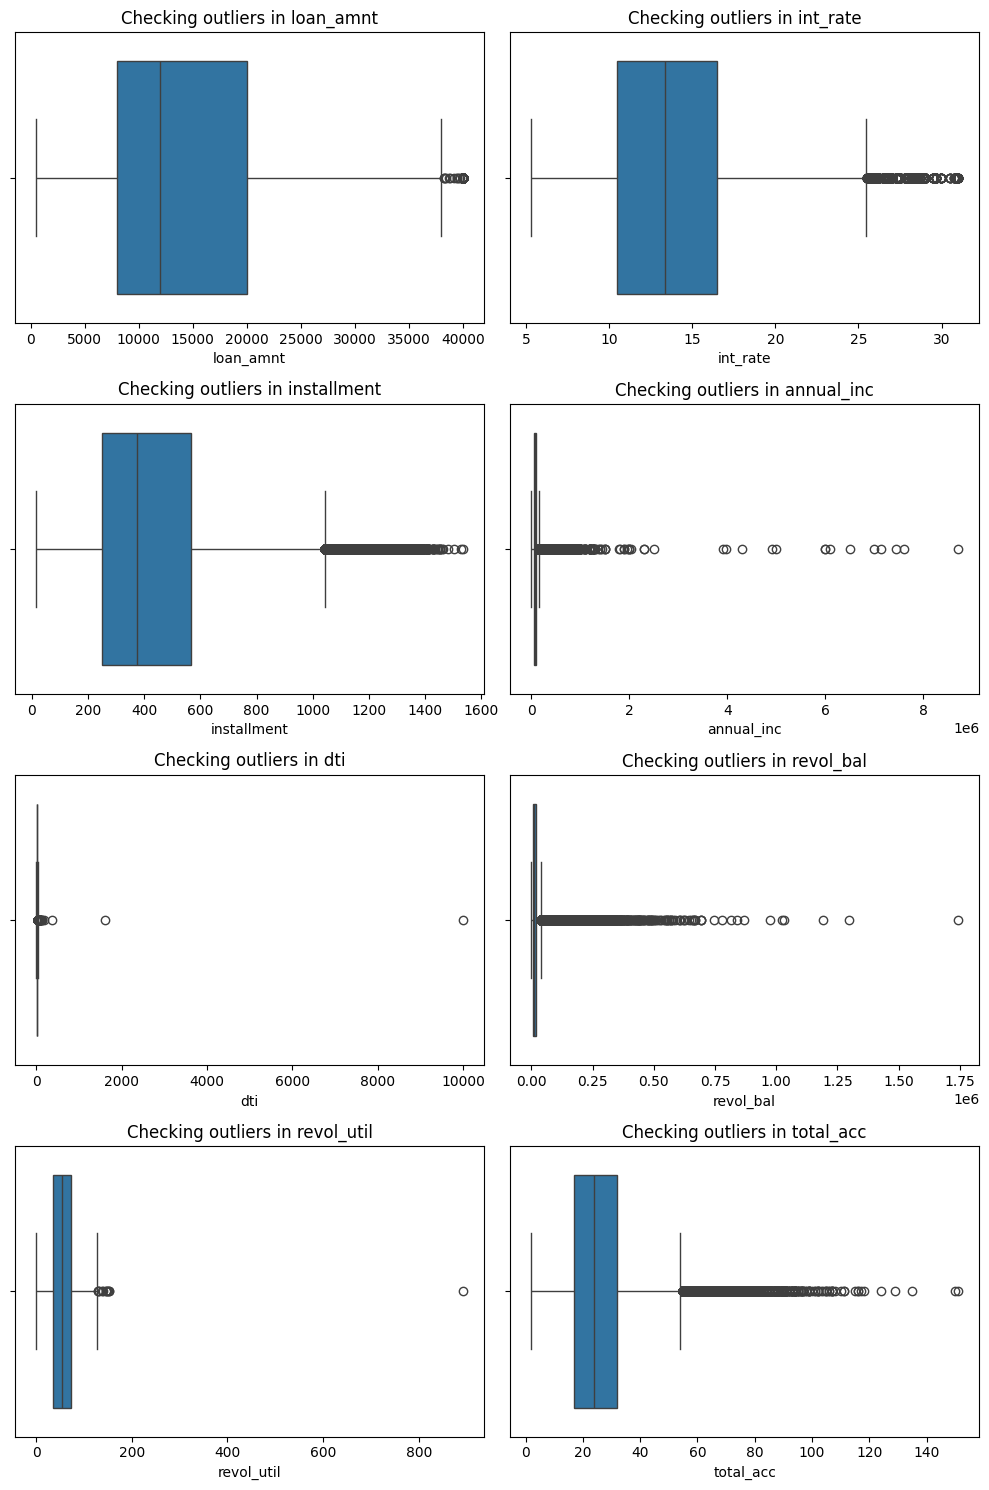

In [109]:
#Outliers visualisation using Boxplots
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
axes = axes.flatten()
for i, ele in enumerate(numerical_column):
    sns.boxplot(x=df[ele], ax=axes[i])
    axes[i].set_title(f"Checking outliers in {ele}")

plt.tight_layout()
plt.show()

### **Observation:**

Almost all numerical columns are affected by **outliers** with different degree of severity.


## **Outlier Treatment**

In [110]:
#Removing outliers using standard deviation (Lets choose 3 std_dev as limit to decide for outlier)
for col in numerical_column:
  mean=df[col].mean()
  std=df[col].std()
  upper = mean + (3*std)
  lower = mean - (3*std)
  df=df[(df[col]<upper) & (df[col]>lower)]

In [111]:
df.shape

(378347, 27)

### **Observation:**

After outlier treatment **361389 rows** now remains in our dataset. We originally had 396030 rows in our dataset.


# **3. Exploratory Data Analysis - 2**

## **Univariate Analysis.**

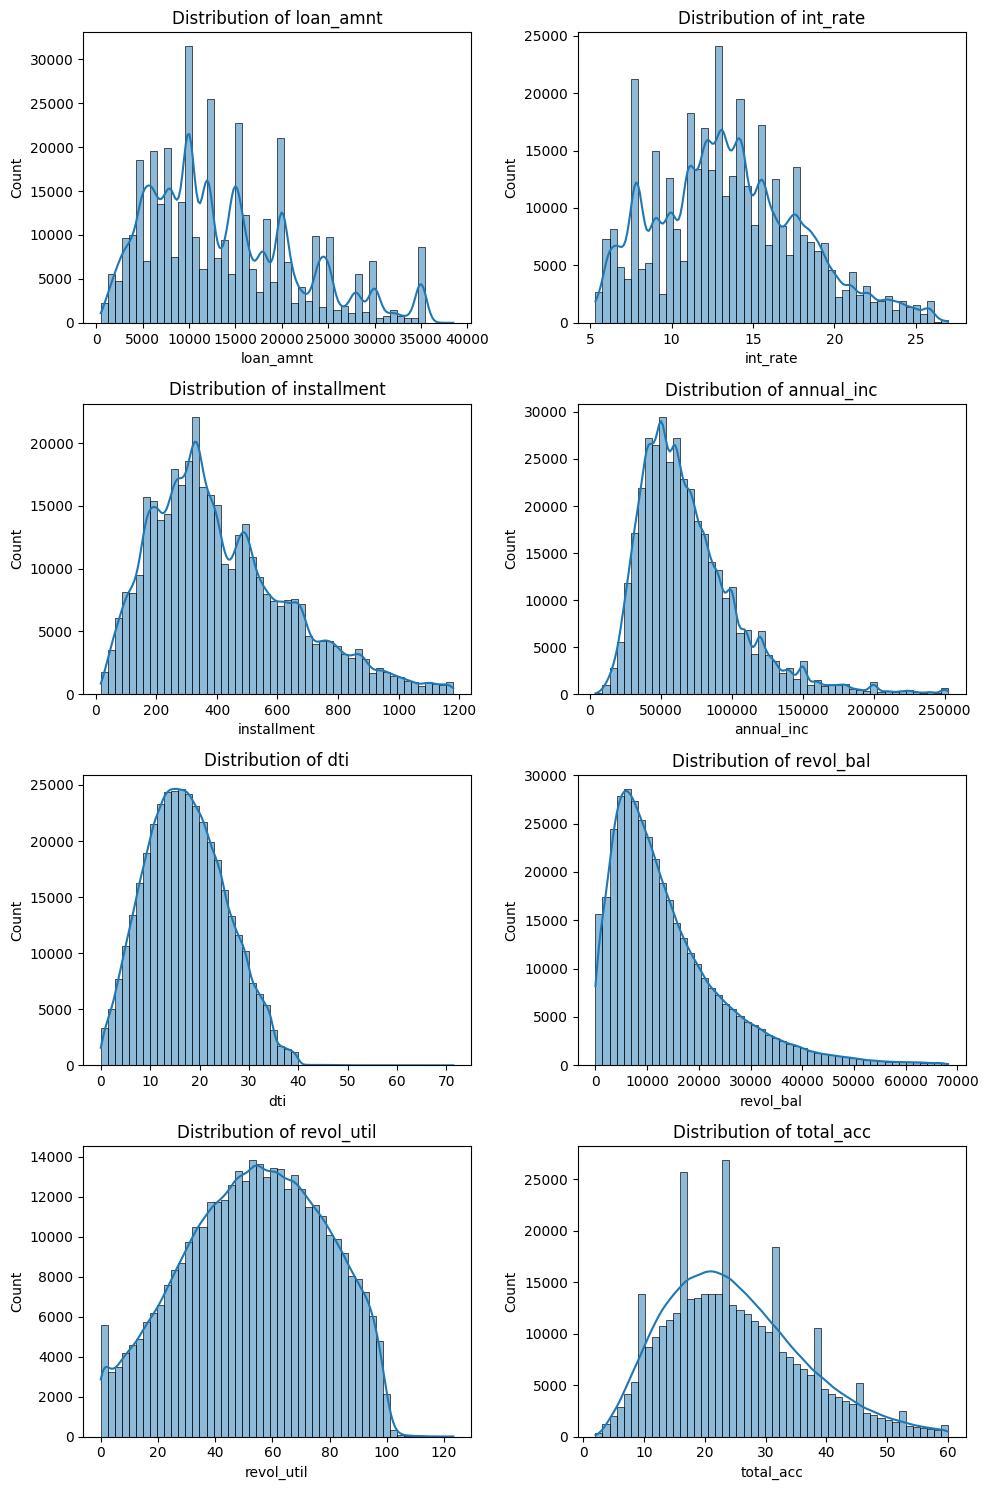

In [112]:
#Plotting Numerical Columns

fig, axes = plt.subplots(4, 2, figsize=(10, 15))
axes = axes.flatten()
for i, ele in enumerate(numerical_column):
  sns.histplot(df[ele], kde=True, bins = 50, ax=axes[i])
  axes[i].set_title(f"Distribution of {ele}")

plt.tight_layout()
plt.show()



### **Observation:**

Most of the numerical column data are **Right-Skewed** i.e. the tail is towards the right end.


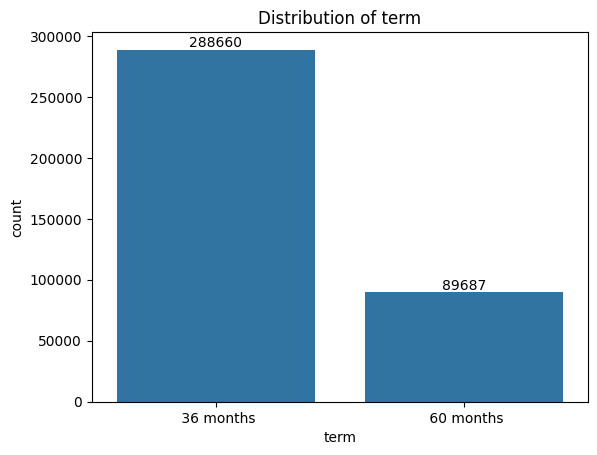

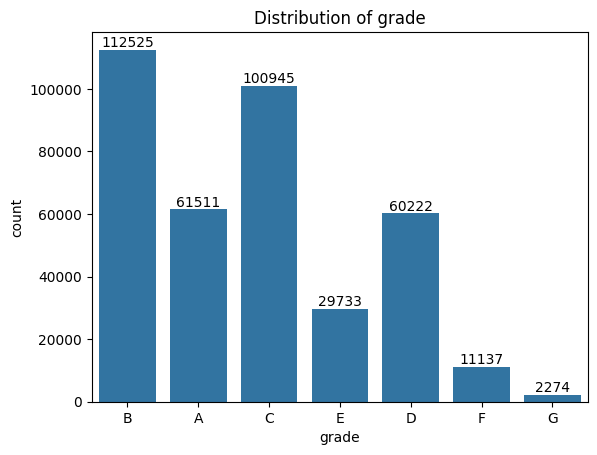

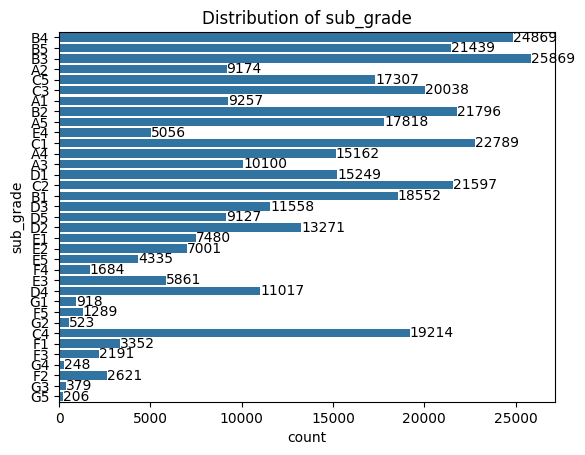

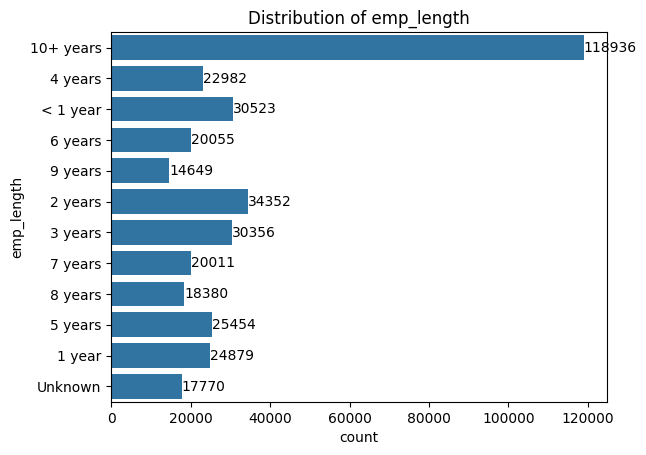

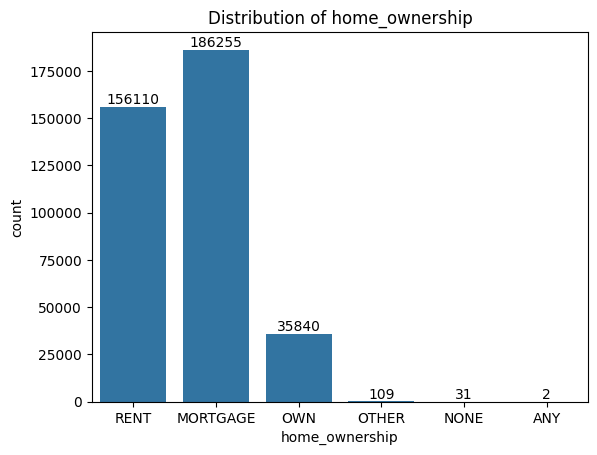

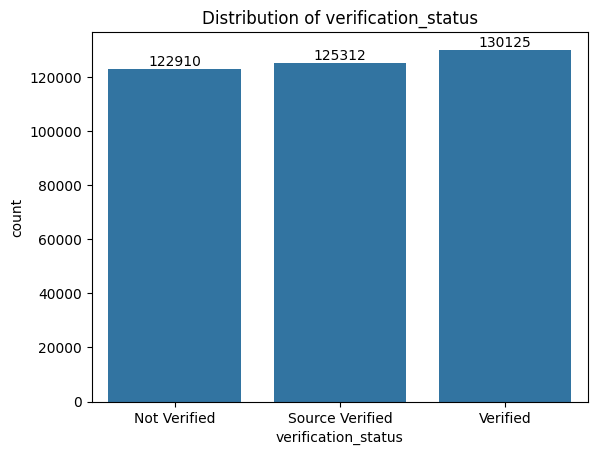

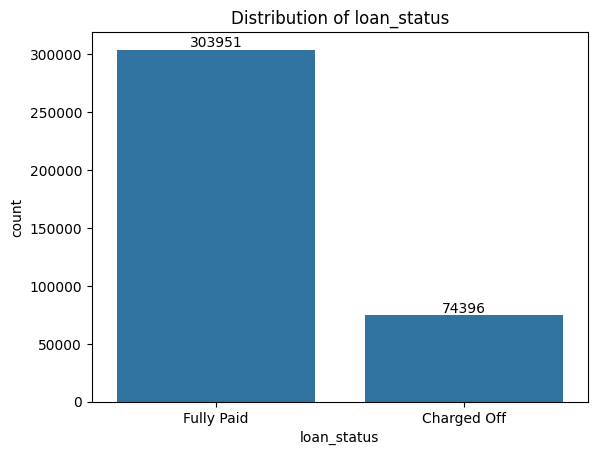

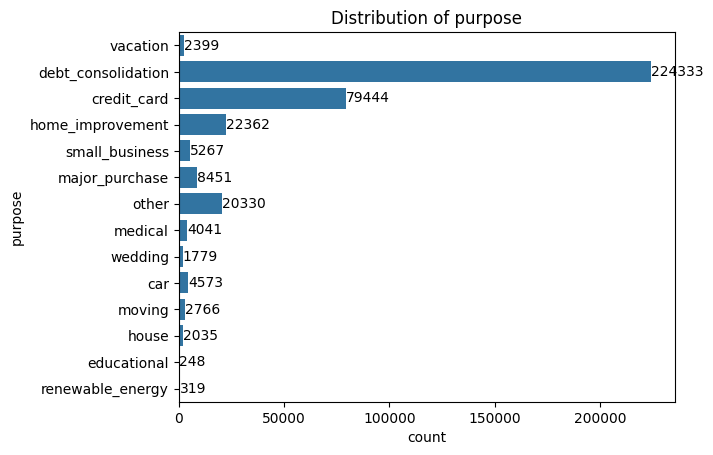

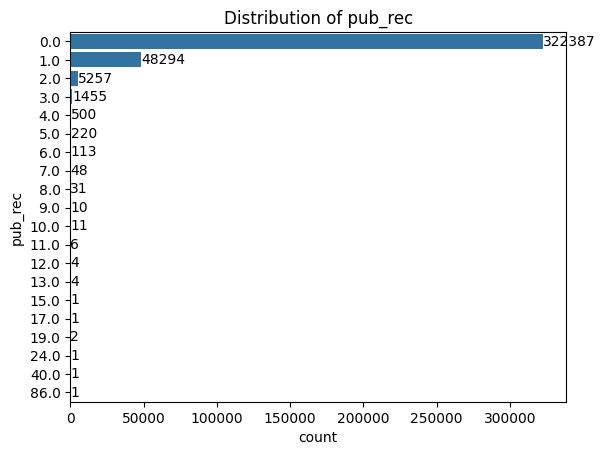

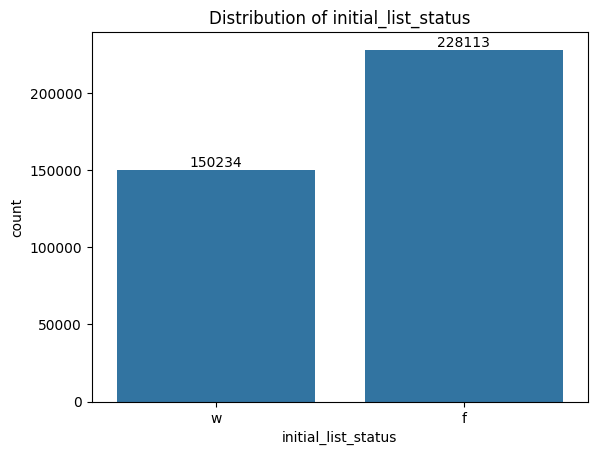

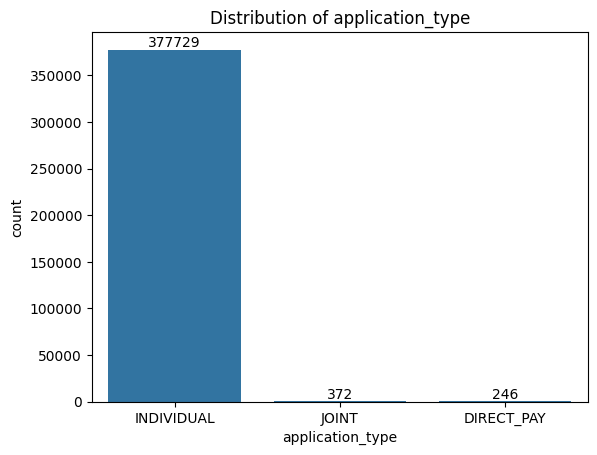

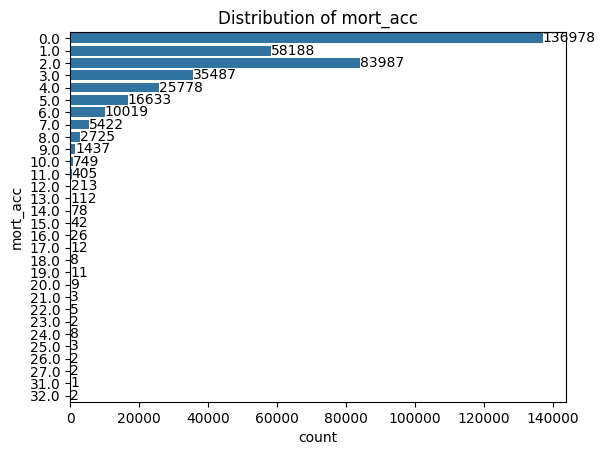

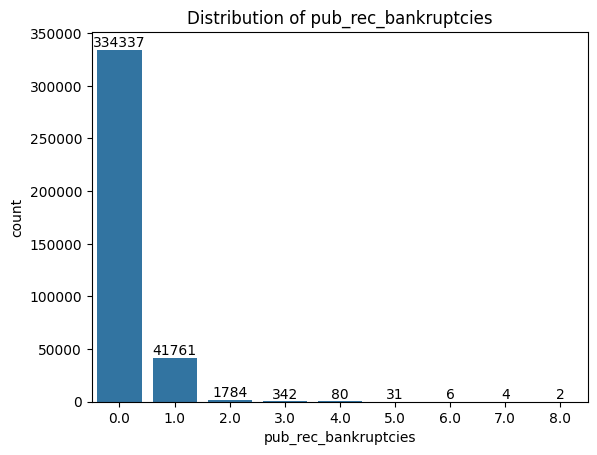

In [113]:
#Plotting Categorical Column

#plt.subplots(7, 2, figsize=(10, 20))

for ele in categorical_column:
  if (ele in ["sub_grade", "emp_length","purpose", "pub_rec", "mort_acc"]):
    ax=sns.countplot(y=df[ele])
    ax.bar_label(ax.containers[0])
    plt.title(f"Distribution of {ele}")
    plt.show()

  else:
    ax=sns.countplot(x=df[ele])
    ax.bar_label(ax.containers[0])
    plt.title(f"Distribution of {ele}")
    plt.show()



In [180]:
df['loan_status'].value_counts(normalize=True) * 100

,proportion
loan_status,
0,80.336569
1,19.663431


### **Observations:**

1. Most of the loan term was if **36 months**.
2. Most of the loans were given to employees having employment length if **10 or more years**.
3. Home ownership status of most of the borrowers is **Rent and Mortgage**.
4. Data is **imbalance** for “loan_staus”. Most of the data belong the loans which were **Fully Paid**.
5. Most of the loan request was for “**debt consolidation**”.
6. Most loans were given to people having **Zero derogatory public records**.
7. Most of the loan borrowers have **Zero mortgage accounts**.


## **Bivariate Analysis.**

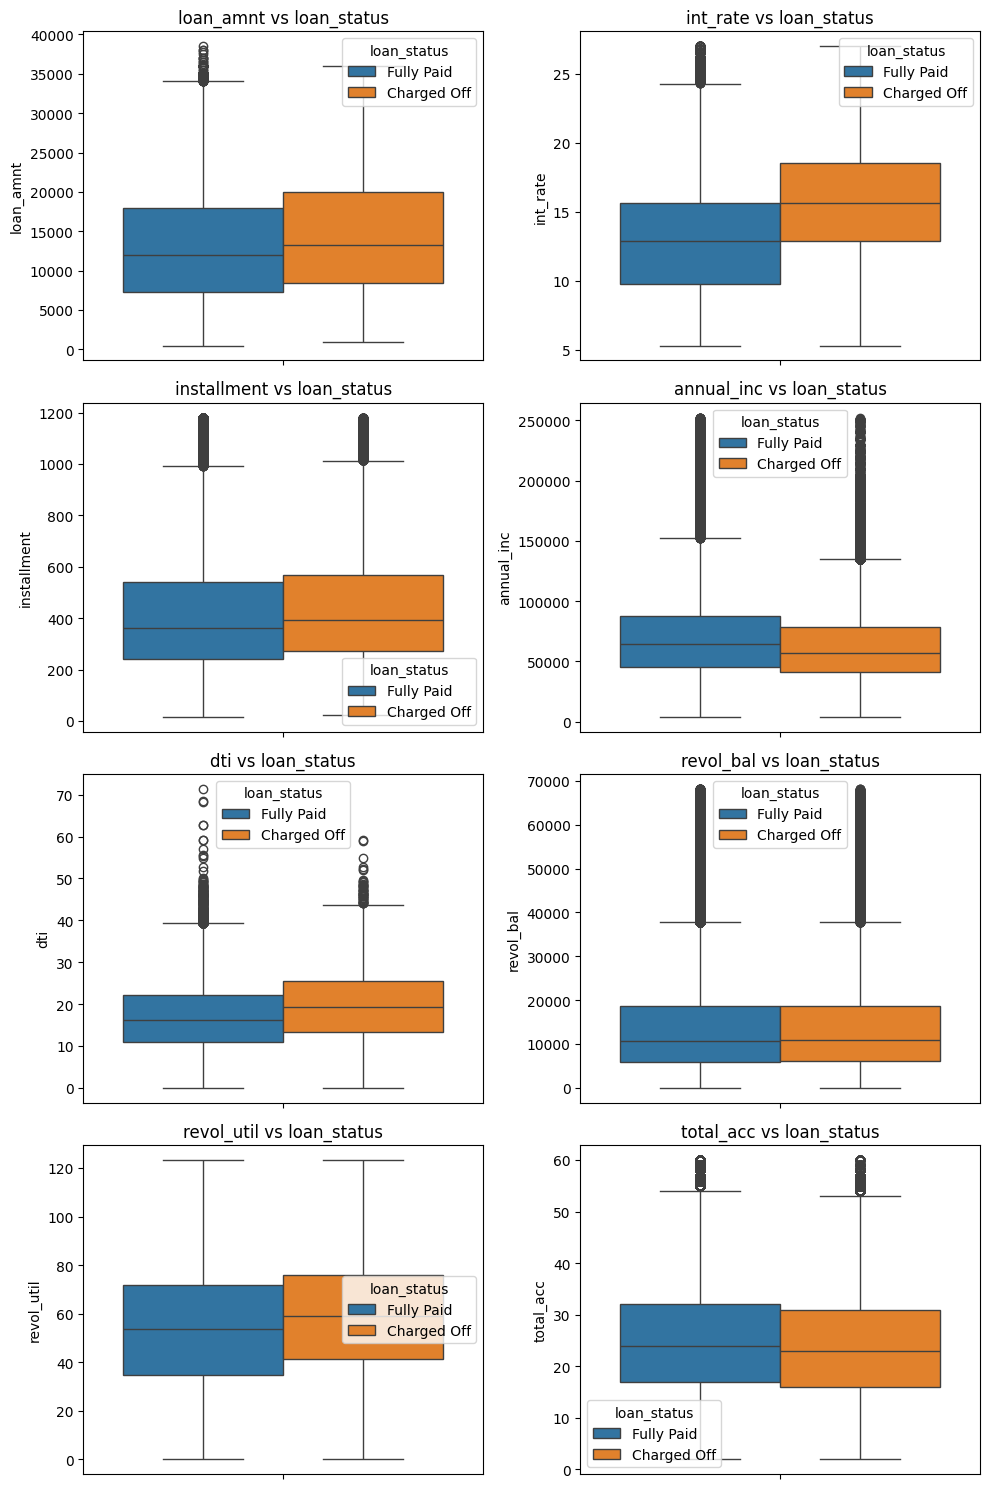

In [114]:
#Plotting Numerical Columns vs loan_status

fig, axes = plt.subplots(4, 2, figsize=(10, 15))
axes = axes.flatten()
for i, ele in enumerate(numerical_column):
    sns.boxplot(y=df[ele], ax=axes[i], hue = df["loan_status"])
    axes[i].set_title(f"{ele} vs loan_status")

plt.tight_layout()
plt.show()



### **Observations:**

1. Mean “**int_rate**” of “charged off” is higher than “Fully Paid” indicating loan with **higher interest** rate is more likely to **default**.
2. Mean “**annual_inc**” of “Fully Paid” is slightly higher than “charged off”, indicating people with higher income are more likely to successfully pay the loan.
3. Mean “**dti**” is higher for “Charged off” than “Fully paid”, indicating people with **higher debt obligations** are more likely to **default** on loan.
4. “revol_bal” appear to have no significant effect on the “loan_status”.


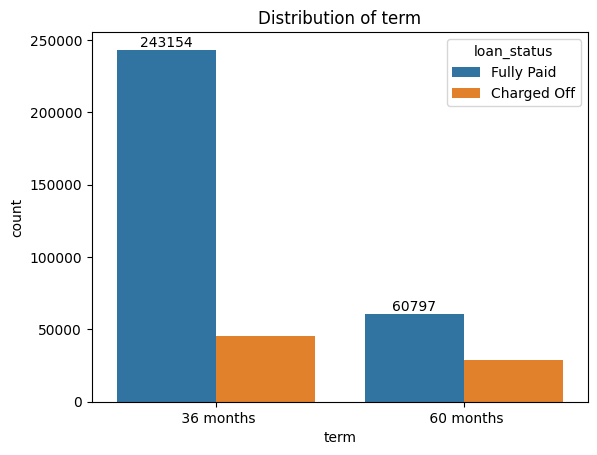

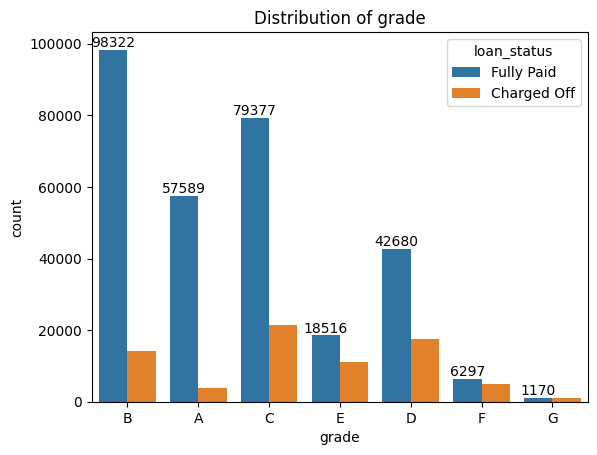

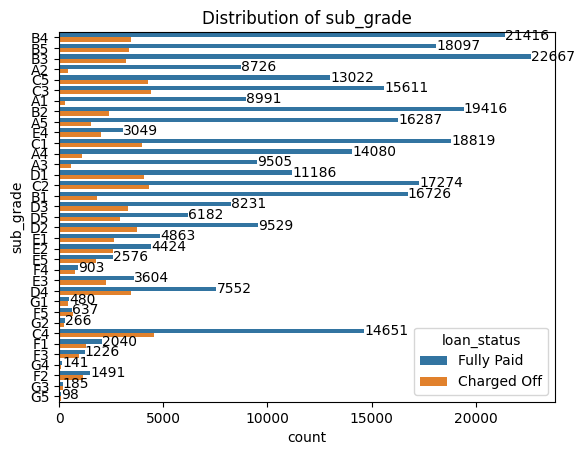

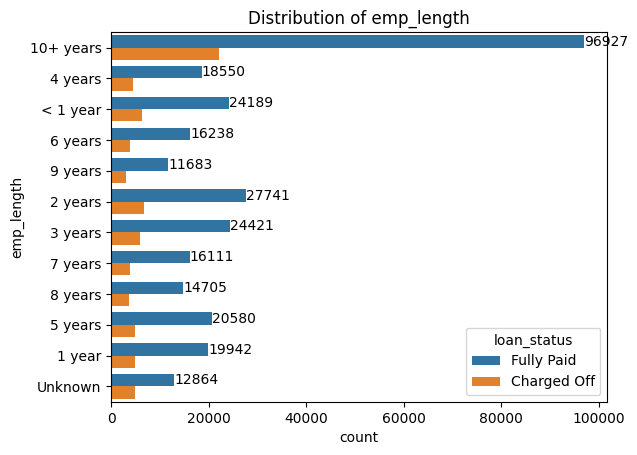

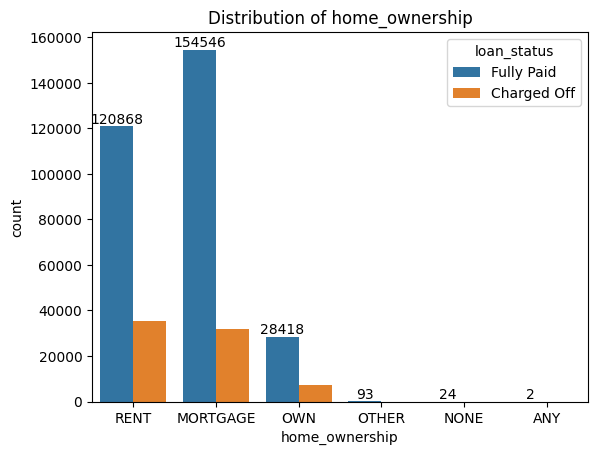

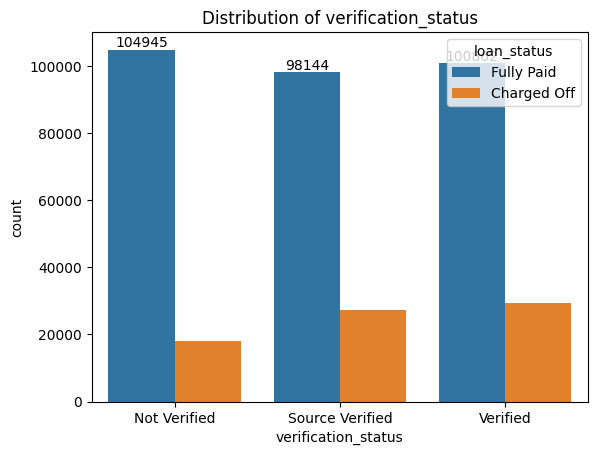

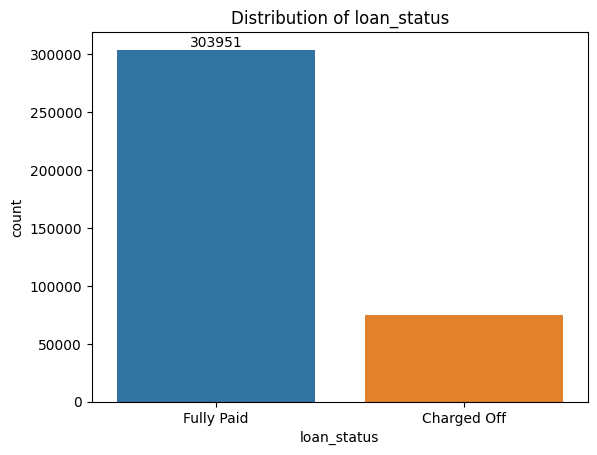

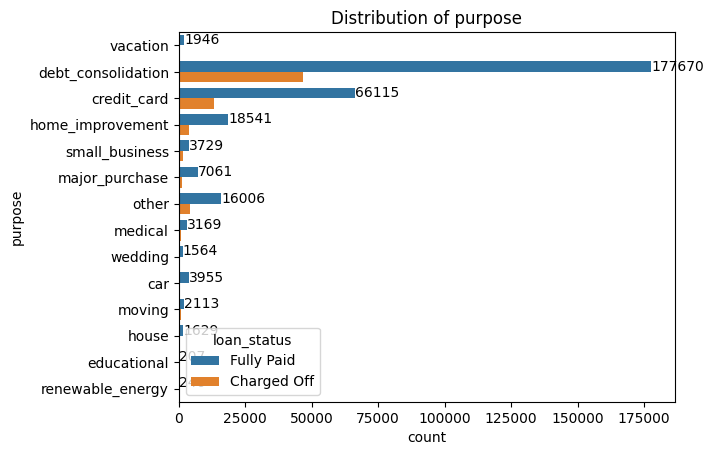

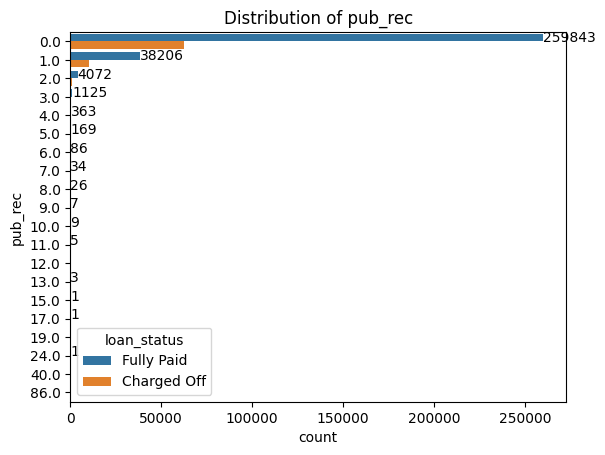

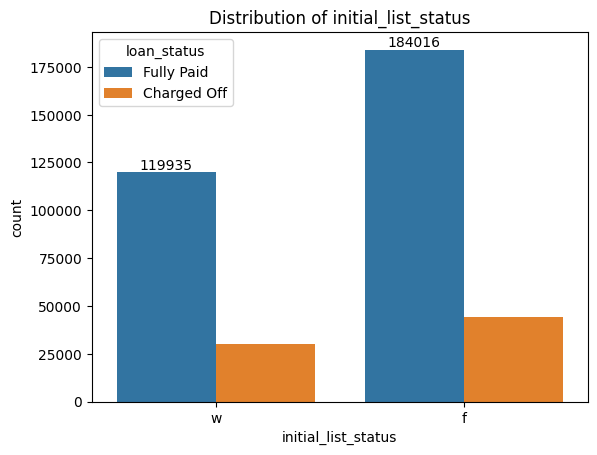

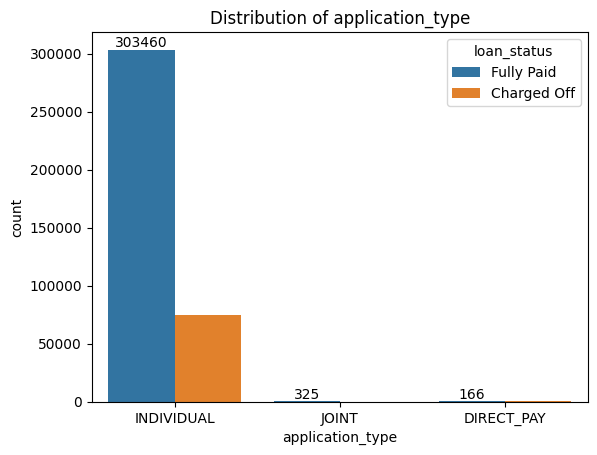

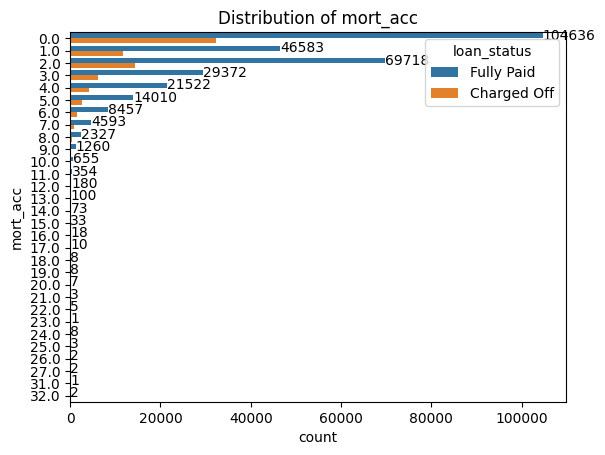

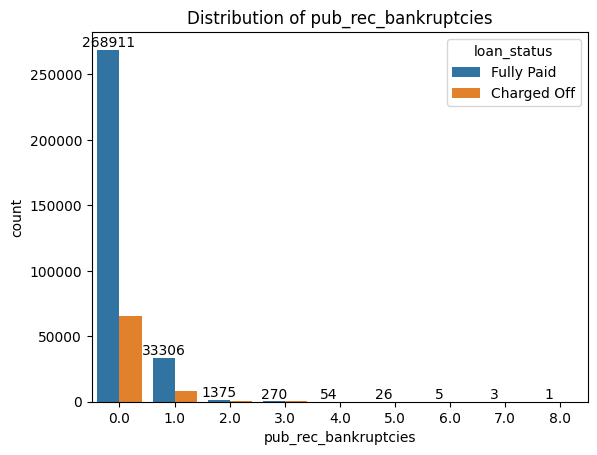

In [115]:
#Plotting Categorical Column vs loan_status

#plt.subplots(7, 2, figsize=(10, 20))

for ele in categorical_column:
  if (ele in ["sub_grade", "emp_length","purpose", "pub_rec", "mort_acc"]):
    ax=sns.countplot(y=df[ele], hue = df["loan_status"])
    ax.bar_label(ax.containers[0])
    plt.title(f"Distribution of {ele}")
    plt.show()

  else:
    ax=sns.countplot(x=df[ele], hue = df["loan_status"])
    ax.bar_label(ax.containers[0])
    plt.title(f"Distribution of {ele}")
    plt.show()

### **Observations:**

1. **60 Months loan** are more likely to **fail** than the 36 months loan.
2. In general, **lower the grade** of loan more is the probability if it turning into a **bad loan**.
3. People with home ownership as **“Rent”** are more likely to **default** than the people who have “Mortgage” their home.
4. Strangely “**Not Verified**” people are **less** likely to default on loan than the “Verified” people.
5. People who have taken loan for “**debt consolidation**” and **“credit card**” have highest number of defaulters.


## **Checking Correlation between Variables.**

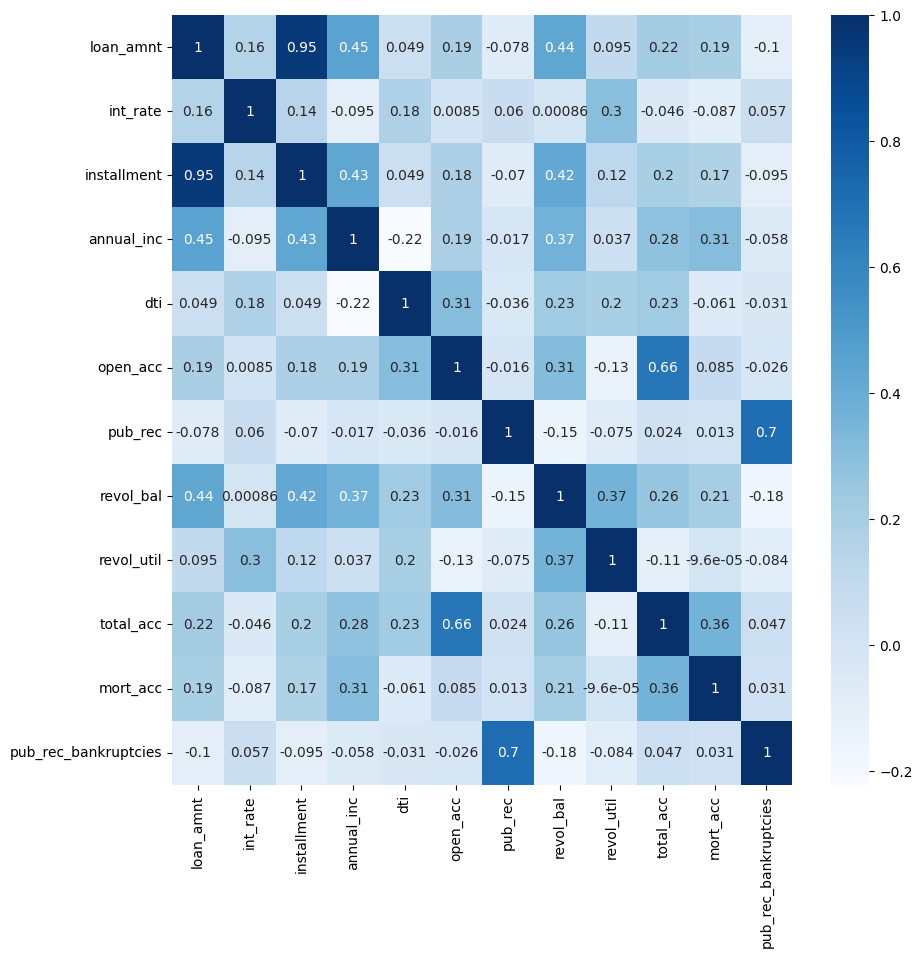

In [116]:
#Plotting Correlation Heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="Blues")
plt.show()

### **Observations:**
1. Both positive and negative correlation exists between different variables.
2. Most of the variables don't have high correlation between them.
3. There is a very high correlation of **0.95** between **“instalment”** and **“loan_amnt”**.


# **4. Data Preprocessing - 2**

In [117]:
#dropping "installment" as it is highly correlated with "loan_amnt"
df.drop(columns=["installment"], axis=1, inplace=True)

## **Feature engineering**

In [118]:
#Creation of Flags: For attributes like Pub_rec, Mort_acc, and Pub_rec_bankruptcies

def loan_func(number):
    if number > 1.0:
        return 1
    else:
        return 0

In [119]:
df['pub_rec']=df.pub_rec.apply(loan_func)
df['mort_acc']=df.mort_acc.apply(loan_func)
df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(loan_func)

In [120]:
# Converting term values to numerical val
term_val={' 36 months': 36, ' 60 months':60}
df['term'] = df.term.map(term_val)

In [121]:
# Mapping the target variable (loan_status)
df['loan_status']=df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [122]:
# Initial List Status
list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df.initial_list_status.map(list_status)

In [123]:
# Fetching ZIP from address
df['zip_code'] = df.address.apply(lambda x: x[-5:])
df.drop(columns=["address"], axis=1, inplace=True)

In [124]:
df['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

## **One Hot Encoding:**

In [125]:
#Data in columns
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,36,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,0,vacation,Vacation,26.24,Jun-1990,16.0,0,36369.0,41.8,25.0,0,INDIVIDUAL,0,0,22690
1,8000.0,36,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,0,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0,20131.0,53.3,27.0,1,INDIVIDUAL,1,0,05113
2,15600.0,36,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,0,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0,11987.0,92.2,26.0,1,INDIVIDUAL,0,0,05113
3,7200.0,36,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,0,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0,5472.0,21.5,13.0,1,INDIVIDUAL,0,0,00813
4,24375.0,60,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,1,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0,24584.0,69.8,43.0,1,INDIVIDUAL,0,0,11650


In [126]:
#Unique value in columns
for i in df.columns:
  print(i,":",df[i].nunique())

loan_amnt : 1376
term : 2
int_rate : 541
grade : 7
sub_grade : 35
emp_title : 167386
emp_length : 12
home_ownership : 6
annual_inc : 25922
verification_status : 3
issue_d : 115
loan_status : 2
purpose : 14
title : 47485
dti : 4222
earliest_cr_line : 678
open_acc : 48
pub_rec : 2
revol_bal : 48476
revol_util : 1204
total_acc : 59
initial_list_status : 2
application_type : 3
mort_acc : 2
pub_rec_bankruptcies : 2
zip_code : 10


In [127]:
# Encoding column where number of categories are reasonable so as to not cause feature explosion
dummies=["grade", "emp_length", "home_ownership", "verification_status", "purpose", "application_type", "zip_code"]
df=pd.get_dummies(df,columns=dummies,drop_first=True)

In [128]:
# Dropping columns where encoding will lead to very huge feature count
df.drop(columns=["sub_grade", "emp_title", "issue_d", "title", "earliest_cr_line"], axis=1, inplace=True)

In [129]:
df.shape

(378347, 62)

## **Data preparation for modeling**

In [130]:
# Separating Independent variables and Target variable

X=df.drop('loan_status',axis=1)
y=df['loan_status']

# Spliting data into train, test and validation
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
print(X_train.shape, X_test.shape, X_val.shape)
print(X_train.shape, y_test.shape, y_val.shape)


(227007, 61) (75670, 61) (75670, 61)
(227007, 61) (75670,) (75670,)


In [131]:
# Scaling data using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [132]:
X_train

array([[-1.4683264 , -0.55767107, -0.58866823, ..., -0.40920561,
        -0.16959867, -0.16981846],
       [-0.20561136, -0.55767107, -1.28759752, ..., -0.40920561,
        -0.16959867, -0.16981846],
       [ 0.92451861, -0.55767107,  0.45633285, ..., -0.40920561,
        -0.16959867, -0.16981846],
       ...,
       [ 0.42574617,  1.79317174, -0.29462031, ..., -0.40920561,
        -0.16959867, -0.16981846],
       [-1.266292  , -0.55767107,  0.61014253, ..., -0.40920561,
        -0.16959867, -0.16981846],
       [-0.0162041 , -0.55767107, -1.46402628, ..., -0.40920561,
        -0.16959867, -0.16981846]])

# **5. Model building and Results Evaluation**

In [133]:
#Training initial model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [134]:
#Model coefficients
model.coef_

array([[ 1.12507271e-01,  2.05263532e-01, -4.59167195e-02,
        -1.77944941e-01,  1.86203986e-01,  1.22446353e-01,
         1.47958626e-02, -5.65154433e-02,  1.03855623e-01,
        -8.92261304e-02,  1.15870295e-02, -5.37235137e-02,
        -1.62287217e-03,  2.81420682e-01,  4.95324076e-01,
         5.31651889e-01,  4.56098119e-01,  3.15133982e-01,
         1.52888131e-01, -4.81876690e-03, -7.89056782e-03,
        -6.07355449e-03, -1.43403277e-02, -5.52126505e-03,
         1.39586682e-03,  5.47933823e-03,  2.54765915e-03,
         6.70956546e-03,  1.82574806e-02,  1.11334971e-01,
        -5.88814552e-02,  3.76072891e-03,  3.92987792e-03,
        -6.03618411e-03,  6.42584533e-02,  8.35848123e-02,
         1.69358155e-02,  3.82678829e-02,  1.03229251e-01,
         1.78684287e-02,  6.36113116e-02,  7.93177265e-03,
         4.73443532e-02,  2.53118634e-02,  1.90005550e-02,
         5.03824256e-02,  6.87641652e-03,  7.32942383e-02,
         1.85401570e-02, -1.78521607e-02,  9.74224832e-0

In [135]:
#model intercept
model.intercept_

array([-4.3491477])

In [136]:
#Model's Accuracy
model.score(X_test,y_test)

0.8875379939209727

In [137]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

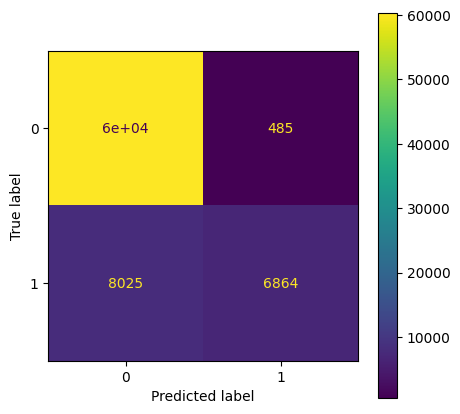

In [138]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)


In [139]:
#Finding Accuracy using Confusion Matrix
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.8875379939209727

In [140]:
#Precision Score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9340046264797932

In [141]:
#Recall Score
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.461011484988918

In [142]:
# F1 Score
from sklearn.metrics import f1_score
print(f'f1Score:{f1_score(y_test,y_pred)}')

f1Score:0.6173217015918697


### **Observations:**
1. Our **Basic Logistic Regression** Model has very good **Accuracy of 0.89**.
2. **Confusion Matrix** indicates our Model is performing very well for negative points but performing poorly for Positive points.
3. Our Model has very high **Precision of 0.93** indicating it gives very less False Positive prediction.
4. Our Model has poor **Recall score of 0.46** indicating it is making a lot of False Negative prediction.
5. Because of poor Recall the overall **F1 Score** for our model **is 0.62** as the F1 score gets affected if negatively of either of Precision or Recall.


## **Improving Model**

### **Balancing Data**

loan_status
0    182478
1     44529
Name: count, dtype: int64


[]

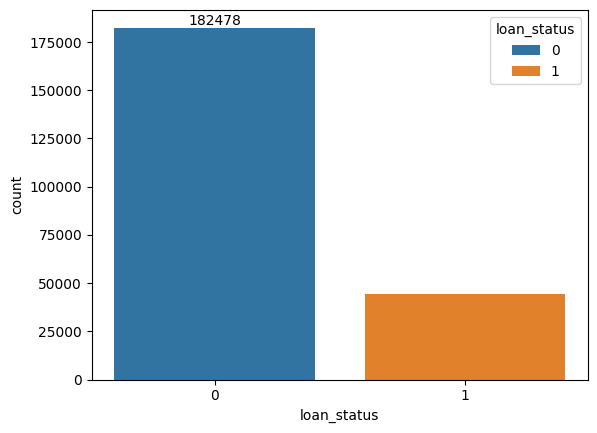

In [143]:
# Checking data imbalance
print(y_train.value_counts())
import seaborn as sns
ax=sns.countplot(x=y_train, hue =y_train)
ax.bar_label(ax.containers[0])
plt.plot()

### **Observation:**
We observe data **imbalance** where negative training datapoints outnumber the positive data points.


In [144]:
# Using SMOTE to balance data
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

loan_status
0    182478
1    182478
Name: count, dtype: int64


[]

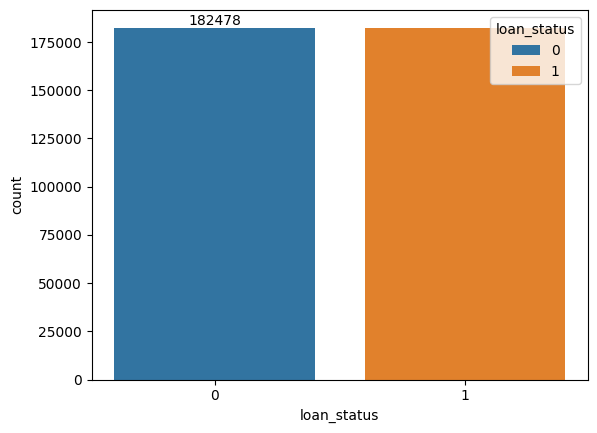

In [145]:
# Checking data imbalance post SMOTE
print(y_sm.value_counts())
import seaborn as sns
ax=sns.countplot(x=y_sm, hue =y_sm)
ax.bar_label(ax.containers[0])
plt.plot()

### **Observation:**
We observe after SMOTE data is now **balanced** and negative training datapoints and positive traing data points are same.


### **Introducing Regularization**

In [146]:
#Finding Right Hyperparameter
model.score(X_test,y_test)

train_scores = []
val_scores = []
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
  model = LogisticRegression(C=1/la)
  model.fit(X_sm, y_sm)
  train_score = model.score(X_sm, y_sm)
  val_score = model.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)

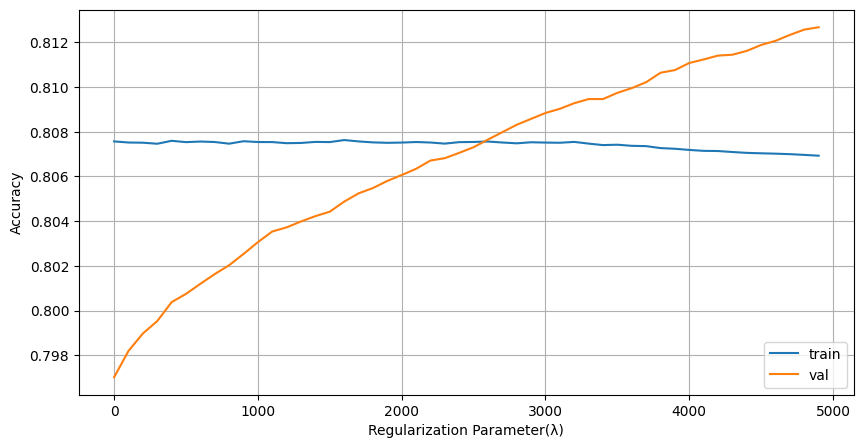

In [147]:
# Plotting graph and pick the Regularization Parameter
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [148]:
#Selecting regularization value of 5000 for our Model as its giving highest accuracy for validation data

model = LogisticRegression(C = 1/5000)
model.fit(X_sm, y_sm)

LogisticRegression(C=0.0002)

In [149]:
#Model coefficients
model.coef_

array([[ 1.05058763e-01,  1.91908867e-01,  2.68863308e-01,
        -2.07696510e-01,  1.86273467e-01,  1.08011590e-01,
         1.64044919e-02, -6.05665737e-02,  1.14132728e-01,
        -9.52248140e-02,  2.09004140e-02, -5.18991827e-02,
         2.90195497e-03,  7.07839244e-02,  1.78305798e-01,
         1.69656574e-01,  1.28674276e-01,  6.92086008e-02,
         3.13632978e-02,  2.34169346e-02, -8.43598359e-03,
        -1.03043359e-02, -1.55877858e-02, -4.22193797e-03,
        -1.93457503e-03,  1.49415146e-03, -2.54498177e-03,
         6.77614079e-03,  1.14015249e-02,  9.86275147e-02,
        -4.63949639e-02,  5.10796104e-03, -8.54652540e-04,
        -2.31919636e-02,  6.10038345e-02,  5.91826711e-02,
        -7.93876428e-03, -3.65520718e-02,  4.83912741e-02,
         1.19513806e-02,  3.18100905e-02,  1.11663744e-03,
         2.14908955e-02,  9.50169801e-03,  1.12132187e-02,
         1.54641219e-02,  3.53848693e-03,  6.18681696e-02,
         1.09748350e-02, -1.92138747e-02,  1.20801795e-0

In [150]:
#model intercept
model.intercept_

array([-0.88124016])

In [151]:
#Model's Accuracy
model.score(X_test,y_test)

0.809211047971455

In [152]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

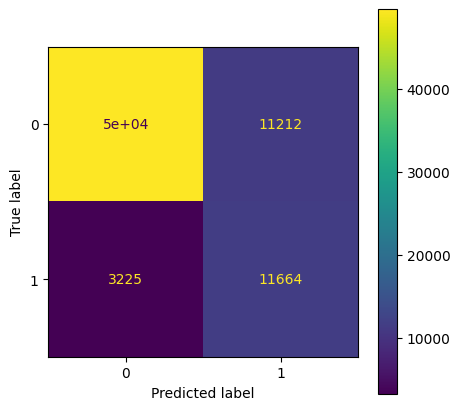

In [153]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)
plt.show()

In [154]:
#Finding Accuracy using Confusion Matrix
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.809211047971455

In [155]:
#Precision Score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.5098793495366323

In [156]:
#Recall Score
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.7833971388273222

In [158]:
# F1 Score
from sklearn.metrics import f1_score
print(f'f1Score:{f1_score(y_test,y_pred)}')

f1Score:0.6177148153051768


### **Observations:**
1. After implementing **SMOTE and regularization** the accuracy of our Model **decreased** from **0.89 to 0.81**.
2. **Confusion Matrix** indicates our model's performance has gone down for negative points but performance has improved for Positive points.
3. Model's **Precision** performance has **degraded** from **0.93 to 0.51** indicating it is giving very high False Positive prediction.
4. Our Model's **Recall** score has **significantly improved** from **0.46 to 0.78** indicating it is making less False Negative prediction.
5. **F1 Score** for our model **remains at 0.62** as the F1 score gets affected negatively because of either of Precision or Recall. Earlier it was getting affected due to poor Recall, now its getting affected by poor Precision.


## **ROC AUC Curve**

In [159]:
from sklearn.metrics import roc_curve, roc_auc_score
probability = model.predict_proba(X_test)
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)

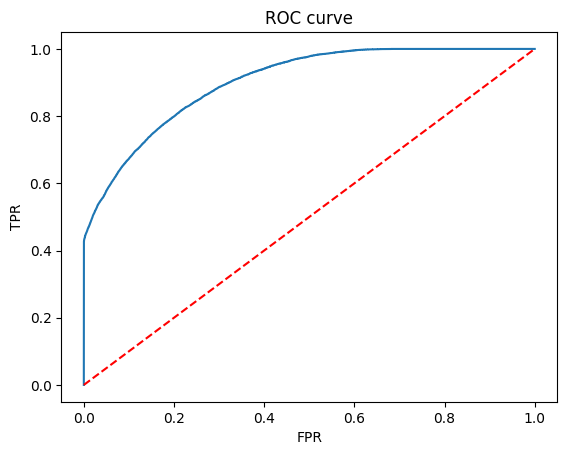

In [160]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [166]:
# AUC
roc_auc_score(y_test,probabilites)

0.9020624345421139

### **Observation:**
Our Model has **AUC of 0.90** indicating that the model is performing well. It means that there's a **90%** chance that the model will be able to **correctly distinguish** between a randomly chosen positive instance and a randomly chosen negative instance.


## **Precision Recall Curve**

In [167]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thr = precision_recall_curve(y_test, probabilites)

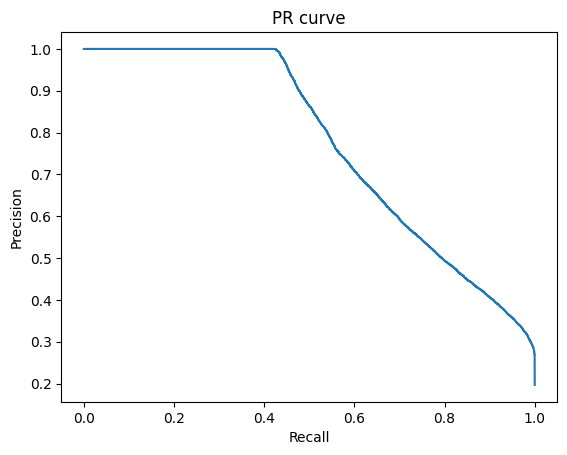

In [168]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [174]:
# Area
auc(recall, precision)

0.7729307298712496

### **Observations:**
1. The area under the **precision-recall curve** (AUC-PR) is **0.77**, which indicates that the model's precision and recall are **balanced**, though **not perfect**.
2. A score of 0.77 means the model is able to achieve a good **balance** between identifying **actual positives** (high recall) while also maintaining a relatively low number of **false positives** (high precision).


## **Tradeoff Questions:**

### **Q1. How can we make sure that our model can detect real defaulters and there are less false positives?**
***ANSWER:***

>To ensure our model effectively detects real **defaulters (true positives)** while reducing the number of false positives we need to focus on increasing both **Recall (identifying real defaulters)** and **Precision (minimizing false positives)**.

>Based on the selection of different **threshold** there is an **inverse relationship** between **Precision and Recall**. Lowering the threshold will increase recall, allowing the model to detect more defaulters, but may also increase false positives i.e. decrease precision thus making us lose out on an opportunity to finance more individuals and earn interest on it.

>So the **solution** is to use the “**precision_recall_curve()**” function to find the **optimal threshold** where precision is high and recall is acceptable.

-------------------------------------------------------------------

### **Q2. Since NPA (non-performing asset) is a real problem in this industry, it's important we play safe and shouldn't disburse loans to anyone.**

***ANSWER:***

>**NPA** (non-performing asset) is a **serious problem** in banking industry but main **source of income** for banks are **interest** earn on loans. If loans are **not disbursed** to anyone the bank will **not earn any revenue**. This will literally **kill the business**.

>So the idea is to **strike a balance** and not try to play over safe. We should not only focus on Recall to **identify the real defaulters** so that out loan don't end up being NPA, but should also keep the Precision reasonable high so as we **don't miss the chance of earning revenue** from a good candidate.
As long as the (Profit - NPA) is **positive** we are good.


# **6. Actionable Insights & Recommendations**

1. Our **Basic Logistic Regression** Model was very good **Accuracy of 0.89** but poor with **Recall score of 0.46**. So, it should only be considered in the case **where NPA is not an issue and profit maximization are priority**.

2. The **model** after balancing data with **SMOTE** and with **regularization** has **good recall** score of 0.78 but **bad precision** score of 0.51. This model should be used in place of basic model if NPA is an issue and banks want to **detect most of the probable defaulters**.

3. To ensure our model effectively detects real **defaulters (true positives)** while reducing the number of false positives we need to focus on increasing both **Recall (identifying real defaulters)** and **Precision (minimizing false positives)**. So we should use the “**precision_recall_curve()**” function to find the **optimal threshold** where precision is high and recall is acceptable.

4. We should **not only** focus on Recall to **identify the real defaulters** so that out loan don't end up being NPA, but should also keep the Precision reasonable high so as we **don't miss the chance of earning revenue** from a good candidate. As long as the (Profit - NPA) is **positive** we are good.

5. In the dataset **80.34%** of customers have fully paid their loans while **19.64%** have defaulted. So, we need to **balance** this data before training the Machine Learning model to improve its accuracy especially to detect the positive case of defaulters.
6. Mean “**int_rate**” of “charged off” is higher than “Fully Paid” indicating loan with **higher interest** rate is more likely to **default**.
7. Mean “**annual_inc**” of “Fully Paid” is slightly higher than “charged off”, indicating people with higher income are more likely to successfully pay the loan.
8. Mean “**dti**” is higher for “Charged off” than “Fully paid”, indicating people with **higher debt obligations** are more likely to **default** on loan.

9. **60 Months loan** are more likely to **fail** than the 36 months loan. So long term loans should be more carefully given.
10. In general, **lower the grade** of loan more is the probability if it turning into a **bad loan**. So grading is important and should be carefully.
11. People with home ownership as **“Rent”** are more likely to **default** than the people who have “Mortgage” their home.
12. People who have taken loan for “**debt consolidation**” and **“credit card**” have highest number of defaulters. So, the person who are already struggling with past due payments should only be given loan after careful consideration.
